# cfgrib

本节介绍如何使用 cfgrib 加载 GRIB2 要素场，并使用 cedarkit-maps 绘图。

## 安装

使用 conda 安装 cfgrib

```bash
conda install -c conda-forge cfgrib
```

## 准备

导入需要的包

In [1]:
import xarray as xr
import pandas as pd
import cfgrib

设置绘图的数据参数，使用 CMA-MESO 2024 年 4 月 1 日 00 时次 024 时效数据。

In [2]:
system_name = "CMA-MESO"
data_type = "cma_meso_3km/grib2/orig"
start_time = pd.to_datetime("2024-04-01 00:00:00")
forecast_time = pd.to_timedelta("24h")

## 加载数据

设置 GRIB2 数据文件路径

> 注：可以使用 reki 库查找本地文件路径

In [3]:
file_path = '/g3/COMMONDATA/OPER/CEMC/MESO_3KM/Prod-grib/2024040100/ORIG/rmf.hgra.2024040100024.grb2'
file_path

'/g3/COMMONDATA/OPER/CEMC/MESO_3KM/Prod-grib/2024040100/ORIG/rmf.hgra.2024040100024.grb2'

> 注：可以使用 reki 库查找本地文件路径

In [4]:
from reki.data_finder import find_local_file

file_path_use_reki = find_local_file(
    data_type,
    start_time=start_time,
    forecast_time=forecast_time,
)
file_path_use_reki

PosixPath('/g3/COMMONDATA/OPER/CEMC/MESO_3KM/Prod-grib/2024040100/ORIG/rmf.hgra.2024040100024.grb2')

使用 cfgrib 加载 2 米温度要素场。


说明：

1. `index=""` 表示不生成 cfgrib 的索引文件
2. `filter_by_keys` 用于设置筛选要素场的条件，这里选择 shortName 为 `2t` 的场

In [7]:
ds = xr.open_dataset(
    file_path,
    engine="cfgrib",
    backend_kwargs={
        "filter_by_keys": {
            "shortName": "2t"
        },
        "indexpath": "",
    }
)
t_2m_field = ds["t2m"] - 273.15
t_2m_field

<xarray.DataArray 't2m' (latitude: 1671, longitude: 2501)> Size: 17MB
array([[-0.7192993 , -0.75930786, -0.80929565, ..., -4.1693115 ,
        -2.879303  , -2.95932   ],
       [-3.6593018 , -3.6693115 , -2.2792969 , ..., -6.9193115 ,
        -6.3193054 , -3.729309  ],
       [-3.5493164 , -3.589325  , -0.85931396, ..., -7.609314  ,
        -7.479309  , -3.4393005 ],
       ...,
       [26.600677  , 26.600677  , 26.590698  , ..., 25.80069   ,
        25.79068   , 25.970703  ],
       [26.590698  , 26.600677  , 26.590698  , ..., 25.7807    ,
        25.7807    , 26.000702  ],
       [26.590698  , 26.590698  , 26.600677  , ..., 25.7807    ,
        25.79068   , 25.970703  ]], dtype=float32)
Coordinates:
    time               datetime64[ns] 8B ...
    step               timedelta64[ns] 8B ...
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 13kB 60.1 60.07 60.04 ... 10.03 10.0
  * longitude          (longitude) float64 20kB 70.0 70.03 70.06 ... 145.0 145.0
    valid_time         datetime64[ns] 8B ...

## 绘图

使用 cedarkit-maps 绘制 2 米温度填充图

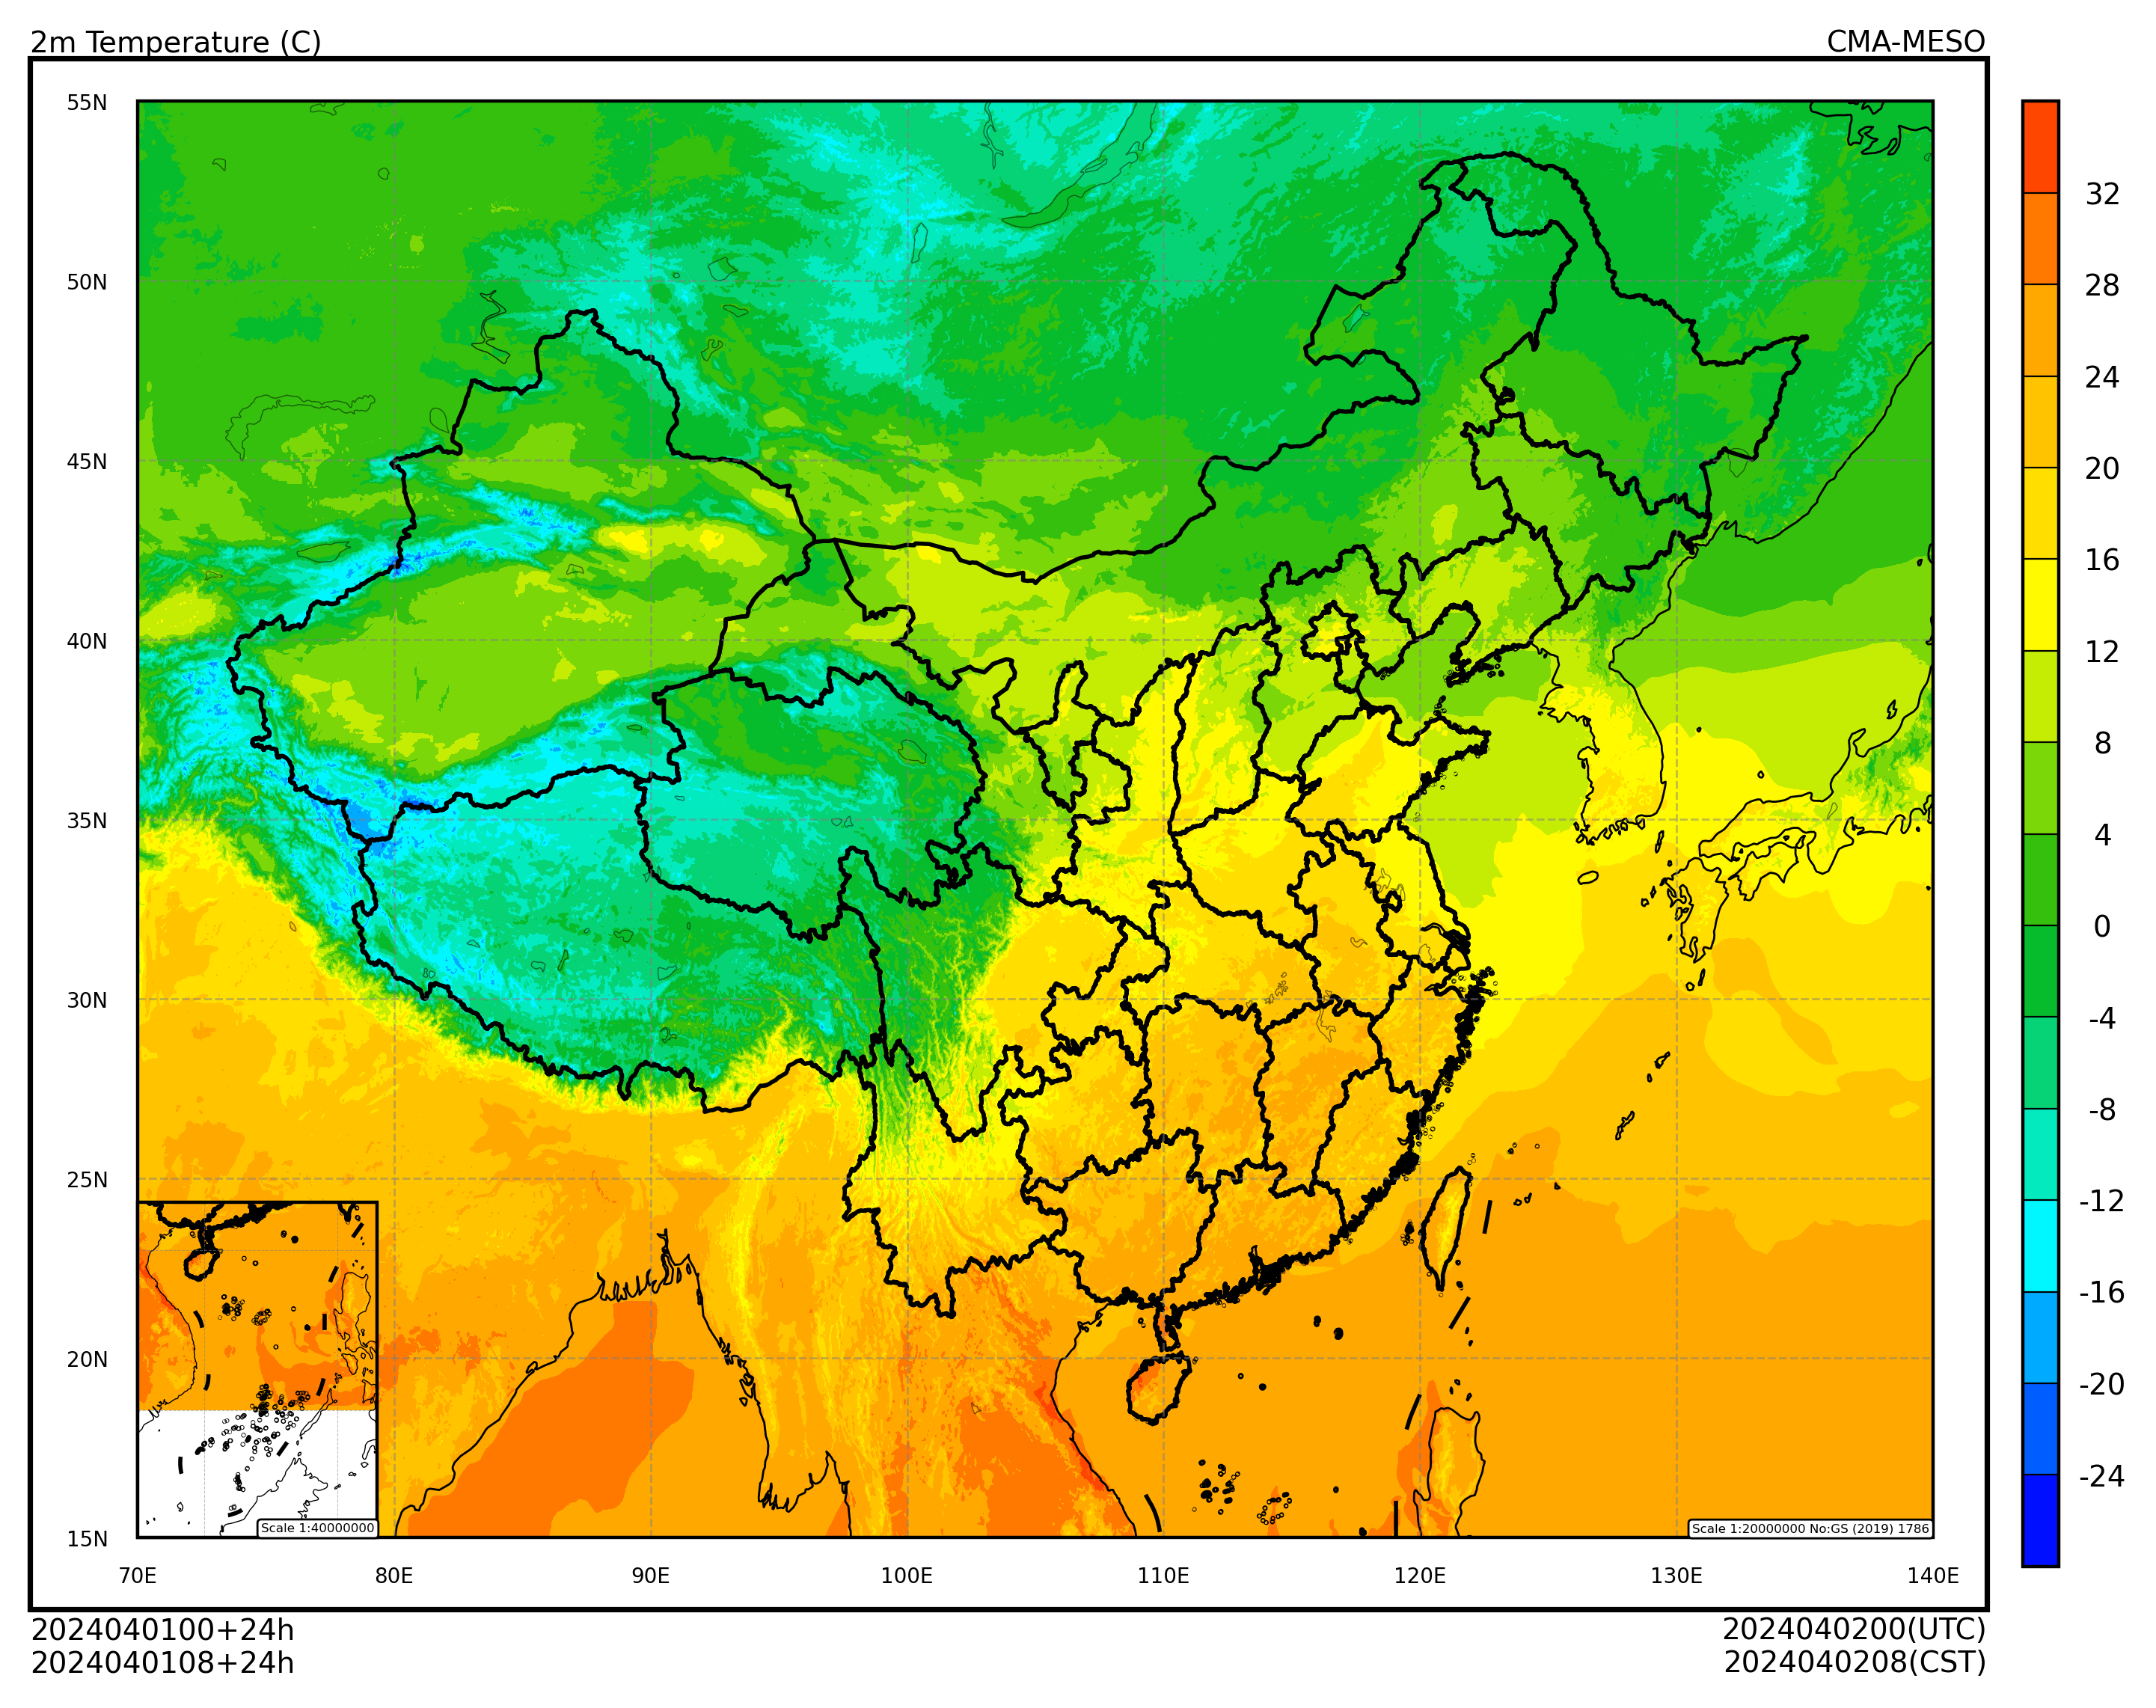

In [8]:
from cedarkit.maps.style import ContourStyle
from cedarkit.maps.chart import Panel
from cedarkit.maps.domains import EastAsiaMapDomain
from cedarkit.maps.colormap import get_ncl_colormap

t_2m_level = [-24, -20, -16, -12, -8, -4, 0, 4, 8, 12, 16, 20, 24, 28, 32]
color_index = [2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142, 152]
t_2m_color_map = get_ncl_colormap("BlAqGrYeOrReVi200", index=color_index)
t_2m_style = ContourStyle(
    colors=t_2m_color_map,
    levels=t_2m_level,
    fill=True,
)
domain = EastAsiaMapDomain()
panel = Panel(domain=domain)
panel.plot(t_2m_field, style=t_2m_style)
domain.set_title(
    panel=panel,
    graph_name="2m Temperature (C)",
    system_name=system_name,
    start_time=start_time,
    forecast_time=forecast_time,
)
domain.add_colorbar(panel=panel, style=t_2m_style)
panel.show()